In [ ]:
#                      ==================
#                        MISIÓN A MARTE
#                      ==================

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
#Para las posiciones iniciales:
import random as rand

In [ ]:
#                   DEFINICIÓN DE FUNCIONES

def x_coord(radio,angulo):
  x = radio*np.cos(angulo)
  return x

def y_coord(radio,angulo):
  y = radio*np.sin(angulo)
  return y

def alfa(planeta: str, tiempo: float) -> float:
  if planeta == "T":
    ang = WT*tiempo + theta_T
  if planeta == "M":
    ang = WM*tiempo + theta_M
  return ang

def Dist_XC(planeta: str, radio: float, theta: float, tiempo: float) -> float:
  if planeta == "T":
    D_XC = np.sqrt(radio**2+D_ST**2-2*radio*D_ST*np.cos(theta-alfa(planeta,tiempo)))
  if planeta == "M":
    D_XC = np.sqrt(radio**2+D_SM**2-2*radio*D_SM*np.cos(theta-alfa(planeta,tiempo)))
  return D_XC

def eq_rt(momento_r):
  drdt = momento_r/m
  return drdt

def eq_thetat(momento_theta,radio):
  dthetadt = momento_theta/(m*radio**2)
  return dthetadt

def eq_pr(momento_theta,radio,theta,tiempo):
  dprdt = momento_theta**2/(m*radio**3) - G*m*MS/radio**2
  dprdt = dprdt - G*m*MT*(radio-D_ST*np.cos(theta-alfa("T",tiempo)))/Dist_XC("T",radio,theta,tiempo)**3
  dprdt = dprdt - G*m*MM*(radio-D_SM*np.cos(theta-alfa("M",tiempo)))/Dist_XC("M",radio,theta,tiempo)**3
  return dprdt

def eq_ptheta(radio,theta,tiempo):
  dpthetadt =           -G*m*MT*radio*D_ST*np.sin(theta-alfa("T",tiempo))/Dist_XC("T",radio,theta,tiempo)**3
  dpthetadt = dpthetadt -G*m*MM*radio*D_SM*np.sin(theta-alfa("M",tiempo))/Dist_XC("M",radio,theta,tiempo)**3
  return dpthetadt

def dif_angulo(x_0,y_0,x_1,y_1,x_2,y_2):
  delta_gamma = np.arcsin(((x_1-x_0)*(y_2-y_0)-(x_2-x_0)*(y_1-y_0))/np.sqrt(((x_1-x_0)**2+(y_1-y_0)**2)*((x_2-x_0)**2+(y_2-y_0)**2)))
  return delta_gamma

def Hamiltoniano(radio,theta,momento_r,momento_theta,tiempo):
  H = momento_r**2/(2*m)+momento_theta**2/(2*m*radio**2)-G*m*(MS/radio + MT/Dist_XC("T",radio,theta,tiempo) + MM/Dist_XC("M",radio,theta,tiempo))
  return H

def Energia_cinetica(radio,momento_r,momento_theta):
  E_k = momento_r**2/(2*m)+momento_theta**2/(2*m*radio**2)
  return E_k

def omega(r):
  w = WT/(r/(D_ST+RT))**2
  return w

def velocidad(r):
  v = np.sqrt( (v_0)**2 - 2*G*MS/(D_ST+RT)*(1 - (D_ST+RT)/r) )
  return v

def velocidad_rad(r):
  v_r = np.sqrt( (r_punto)**2 + ((D_ST+RT)*WT)**2*(1 - (D_ST+RT)**2/r**2) - 2*G*MS/(D_ST+RT)*(1 - (D_ST+RT)/r) )
  return v_r

def angulo(r):
  ang = (WM-omega(r))/velocidad(r)*np.sqrt(1+r**2*(omega(r)/velocidad_rad(r))**2)
  return ang

def trap(f, n, a, b):
    h = (b - a) / float(n)
    intgr = 0.5 * h * (f(a) + f(b))
    for i in range(1, int(n)):
        intgr = intgr + h * f(a + i * h)
    return intgr



In [ ]:
#        DEFINICIÓN DE CONSTANTES Y CONDICIONES INICILAES

#Semilla para generar las posiciones iniciales de Marte y la Tierra
semilla = 22
rand.seed(semilla)

#Masas (kg):
MS = 1.989E30 #Sol
MT = 5.972E24 #Tierra
MM = 6.418E23 #Marte
m  = 3.8170E6 #Cohete

#Distancias (km):
D_ST = 151.65E6
D_SM = 250.71E6

RT = 6378.1
RM = 3389.5
RS = 1.39E6

#Velocidades angulares (rad/h):
WT = 2*np.pi/(365.256*24)  #Tierra
WM = 2*np.pi/(686.971*24)  #Marte

#Cte de gravitación universal (m^3 kg^-1 s^-2)
G = 6.67E-11

#Velocidad máxima del cohete (km/h):
v_max = 80e3

#Ángulo de lanzamiento:
beta = 19*(np.pi/180)

#CONDICIONES INICIALES:
#Tierra:
theta_T = -np.pi/4*rand.random() #(rad)

#Marte:
theta_M =  np.pi/4*rand.random() #(rad)

#Cohete:
#Coordenadas
theta_0 = theta_T    #(rad)
r_0 = D_ST + RT      #(km)

#Velocidades
r_punto = v_max         #(km/h)
theta_punto = WT        #(rad/h)
v_0 = np.sqrt(r_punto**2+(r_0*theta_punto)**2) #(km/h)

#Órbita Marciana
R_orb = 40000           #(km)


#CONVERSIÓN DE UNIDADES:

# distancia ----> Dist. Sol-Tierra
# tiempo -------> Días
# masa   -------> Masa Sol

MT = MT/MS
MM = MM/MS
m = m/MS

D_SM = D_SM/D_ST
RT = RT/D_ST
RM = RM/D_ST
RS = RS/D_ST

WT = WT*24
WM = WM*24

G = G*MS*(24*3600)**2/(D_ST*1000)**3

v_max = v_max*24/D_ST

r_0 = r_0/D_ST
r_punto = r_punto*24/D_ST
theta_punto = theta_punto*24
v_0 = v_0*24/D_ST
v_esc_T = v_esc_T = np.sqrt(2*G*MT/RT)

R_orb = R_orb/D_ST

MS=1
D_ST=1

#Ángulo de lanzamiento
alpha_lan = trap(angulo, 100000, D_ST+RT, D_SM)
alpha_correccion = 0
#alpha_correccion = -0.0245 #dt = 0.0001
alpha_correccion = -0.01880  #dt = 0.001
print("El ángulo de lanzamiento es:",round(alpha_lan*180/np.pi,2),"º (más una corrección de",round(alpha_correccion*180/np.pi,2),"º)")

El ángulo de lanzamiento es: -3.54 º (más una corrección de 0.0 º)


In [ ]:
#               PARÁMETROS DE LA SIMULACIÓN

T_sim = 250   # días
dt = 0.001    # 1 min 36 s
N_sim = int(T_sim/dt)

#Animación:
T_anim =  25   #seg
num_fps = 25
num_frames = T_anim*num_fps

Coef_prop = int(N_sim/num_frames)


#Array de coordenadas temporal
q_T = np.zeros((N_sim,2),dtype=float) #1ª Col para la coor r
                                      #2ª Col para la coor theta
#Añadimos las condiciones iniciales
q_T[0,:] = r_0,theta_0

#Array de momentos
p_T = np.zeros((N_sim,2),dtype=float)

#Condiciones iniciales
p_T[0,:] = 0, m*r_0**2*theta_punto
#           = p_r           = p_theta

In [ ]:
#                 MÉTODO DE RUNGE-KUTTA

K = np.zeros((4,4)) #En cada fila se guardan los 4 coef. de Runge-Kutta
                    #de una misma variable

contador = 0
distancia_MC = np.zeros(N_sim)

for i in np.arange(0,N_sim-1):

  if contador != 0:
    #1er Coeficiente Runge-Kutta
    #Coef. de r
    K[0,0] =     dt*eq_rt(p_T[i,0])
    #Coef. de theta
    K[1,0] = dt*eq_thetat(p_T[i,1], q_T[i,0])
    #Coef. de p_r
    K[2,0] =     dt*eq_pr(p_T[i,1], q_T[i,0], q_T[i,1], i*dt)
    #Coef. de p_theta
    K[3,0] = dt*eq_ptheta(q_T[i,0], q_T[i,1], i*dt)

    #2º
    #Coef. de r
    K[0,1] =     dt*eq_rt(p_T[i,0] +K[2,0]/2)
    #Coef. de theta
    K[1,1] = dt*eq_thetat(p_T[i,1] +K[3,0]/2,  q_T[i,0] +K[0,0]/2)
    #Coef. de p_r
    K[2,1] =     dt*eq_pr(p_T[i,1] +K[3,0]/2,  q_T[i,0] +K[0,0]/2,  q_T[i,1] +K[1,0]/2,  i*dt +dt/2)
    #Coef. de p_theta
    K[3,1] = dt*eq_ptheta(q_T[i,0] +K[0,0]/2,  q_T[i,1] +K[1,0]/2,  i*dt +dt/2)

    #3º
    #Coef. de r
    K[0,2] =     dt*eq_rt(p_T[i,0] +K[2,1]/2)
    #Coef. de theta
    K[1,2] = dt*eq_thetat(p_T[i,1] +K[3,1]/2,  q_T[i,0] +K[0,1]/2)
    #Coef. de p_r
    K[2,2] =     dt*eq_pr(p_T[i,1] +K[3,1]/2,  q_T[i,0] +K[0,1]/2,  q_T[i,1] +K[1,1]/2,  i*dt +dt/2)
    #Coef. de p_theta
    K[3,2] = dt*eq_ptheta(q_T[i,0] +K[0,1]/2,  q_T[i,1] +K[1,1]/2,  i*dt +dt/2)

    #4º
    #Coef. de r
    K[0,3] =     dt*eq_rt(p_T[i,0] +K[2,2])
    #Coef. de theta
    K[1,3] = dt*eq_thetat(p_T[i,1] +K[3,2],  q_T[i,0] +K[0,2])
    #Coef. de p_r
    K[2,3] =     dt*eq_pr(p_T[i,1] +K[3,2],  q_T[i,0] +K[0,2],  q_T[i,1] +K[1,2],  i*dt +dt)
    #Coef. de p_theta
    K[3,3] = dt*eq_ptheta(q_T[i,0] +K[0,2],  q_T[i,1] +K[1,2],  i*dt +dt)

    q_T[i+1,0] = q_T[i,0] + (K[0,0] +2*K[0,1] +2*K[0,2] +K[0,3])/6
    q_T[i+1,1] = q_T[i,1] + (K[1,0] +2*K[1,1] +2*K[1,2] +K[1,3])/6
    p_T[i+1,0] = p_T[i,0] + (K[2,0] +2*K[2,1] +2*K[2,2] +K[2,3])/6
    p_T[i+1,1] = p_T[i,1] + (K[3,0] +2*K[3,1] +2*K[3,2] +K[3,3])/6

  if contador == 0:
    q_T[i+1,0] = (D_ST+RT)
    q_T[i+1,1] = alfa("T",i*dt)
    p_T[i+1,0] = 0
    p_T[i+1,1] = m*(D_ST+RT)**2*WT

  if q_T[i+1,1]-alfa("M",i*dt) >= alpha_lan + alpha_correccion and contador == 0:
    print(f"Informe de misión:\n Alcanzado el águlo de lanzamiento.\n Tiempo de misión t = {round(i*dt,2)}")
    print(i)
    print("")
    t_lan = i
    p_T[i+1,0] = m*v_max
    p_T[i+1,1] = m*(D_ST+RT)**2*WT
    contador = 1

  if Dist_XC("M",q_T[i+1,0],q_T[i+1,1],i*dt)<=R_orb and contador==1:
    print(f"Informe de misión:\n Entrando en órbita marciana estable.\n Tiempo de misión t = {round(i*dt,2)}")
    print(i)
    print("")
    t_orb = i
    R_orb_prima = Dist_XC("M",q_T[i+1,0],q_T[i+1,1],i*dt)
    v_orb = np.sqrt(G*MM/R_orb_prima)

    contador = 2
    gamma = np.arcsin((q_T[i+1,0]*np.sin(q_T[i+1,1])-D_SM*np.sin(alfa("M",(i+1)*dt)))/R_orb_prima)
    p_T[i+1,0] = m*(D_SM*WM*np.sin(q_T[i+1,1]-alfa("M",(i+1)*dt))-v_orb*np.sin(q_T[i+1,1]-gamma))
    p_T[i+1,1] = m*q_T[i+1,0]*(D_SM*WM*np.cos(q_T[i+1,1]-alfa("M",(i+1)*dt))-v_orb*np.cos(q_T[i+1,1]-gamma))

    print("Informe de misión:\n El ángulo de entrada en órbita respecto\n del sistema marciano es de:",\
          round(gamma*180/np.pi,2),"º")
    print(" ")

  if Dist_XC("M",q_T[i,0],q_T[i,1],i*dt) >= 1e2*R_orb and contador == 2:
    print(f"Fallo de misión:\n No se consiguió entrar en órbita estable.\n Tiempo de misión t = {round(i*dt,2)}")
    print(i)
    print("")
    N_sim = i
    Coef_prop = int(N_sim/num_frames)
    break


  distancia_MC[i] = Dist_XC("M",q_T[i+1,0],q_T[i+1,1],i*dt)


print("")
print("Tiempo de misión:",round(N_sim*dt,2)," días.")

print("")
print("Distancia mínima:",round(np.min(distancia_MC[0:N_sim-1])*151.65E6,2),"km")
print("Radio orbital:",round(R_orb*151.65E6,2),"km")

#Paso a coordenadas cartesianas
r = np.zeros((N_sim,2))
q_T = np.resize(q_T,(N_sim,2))
p_T = np.resize(p_T,(N_sim,2))

r[:,0] = x_coord(q_T[:,0],q_T[:,1])
r[:,1] = y_coord(q_T[:,0],q_T[:,1])


#Se guardan los resultados de la simulación en un fichero de texto
#únicamente se guardan las posiciones del cohete.
fichero = open(f"Seed={semilla} ; T_sim={round(i*dt,2)} ; dt={dt} ; ang_correccion={alpha_correccion}.txt","w")
np.savetxt(fichero, r)
fichero.close()


Informe de misión:
 Alcanzado el águlo de lanzamiento.
 Tiempo de misión t = 99.43
99426


Tiempo de misión: 250.0  días.

Distancia mínima: 4225333.44 km
Radio orbital: 40000.0 km


Text(0, 0.5, 'Distancia (UA)')

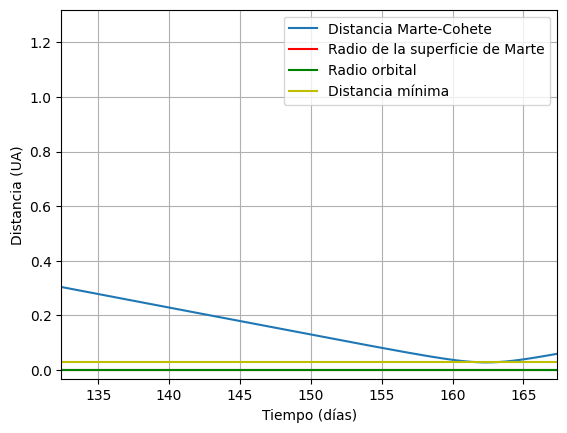

In [ ]:
#               DISTANCIA MARTE-COHETE

t_max = int(N_sim-1)
tiempo = np.arange(0,t_max)*dt

t_d_min = np.argmin(distancia_MC[0:t_max])*dt
plt.grid()
#plt.yscale("log")
#plt.ylim(1e-4,1e-3)
plt.xlim(t_d_min-30,t_d_min+5)
plt.plot(tiempo,distancia_MC[0:t_max],"-")

plt.axhline(RM,color="r")
plt.axhline(R_orb,color="g")
plt.axhline(np.min(distancia_MC[0:t_max]),color="y")

plt.legend(("Distancia Marte-Cohete","Radio de la superficie de Marte", "Radio orbital","Distancia mínima"))

plt.xlabel("Tiempo (días)")
plt.ylabel("Distancia (UA)")



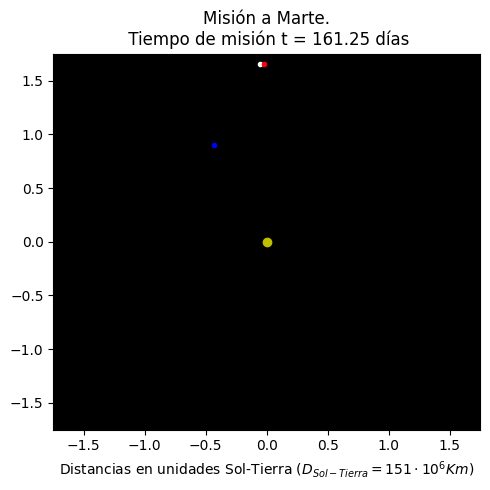

In [ ]:
#                   GRÁFICA DE PRUEBA
T = int(N_sim*0.645)

fig, ax = plt.subplots(figsize=(5,5))

ax = plt.gca()
ax.set_facecolor("black")
#plt.grid()
ax.plot(r[T,0],r[T,1],"w.")
ax.plot([0],[0],"yo",x_coord(D_ST,alfa("T",T*dt)),y_coord(D_ST,alfa("T",T*dt)),"b.",\
        x_coord(D_SM,alfa("M",T*dt)),y_coord(D_SM,alfa("M",T*dt)),"r.")


ax.set_xlim(-1.75,1.75)
ax.set_ylim(-1.75,1.75)
"""
ax.set_xlim(r[T,0]-0.001,r[T,0]+0.001)
ax.set_ylim(r[T,1]-0.001,r[T,1]+0.001)
"""

ax.set_xlabel("Distancias en unidades Sol-Tierra ($D_{Sol-Tierra}=151\cdot10^{6} Km$)")
ax.set_title(f"Misión a Marte.\n Tiempo de misión t = {round(T*dt,2)} días")

plt.tight_layout()

Text(0.5, 1.0, 'Misión a Marte.\n Tiempo de misión t = 250.0 días')

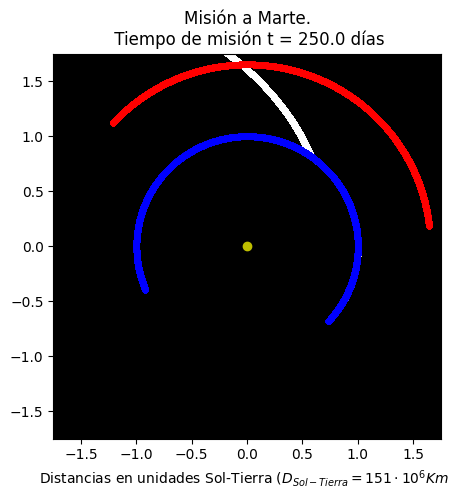

In [ ]:
#                   TRAYECTORIAS
t_max = int(N_sim)

x_T = np.zeros(N_sim)
y_T = np.zeros(N_sim)
x_M = np.zeros(N_sim)
y_M = np.zeros(N_sim)

for i in np.arange(0,N_sim):
  x_T[i],y_T[i] = x_coord(D_ST,alfa("T",i*dt)),y_coord(D_ST,alfa("T",i*dt))
  x_M[i],y_M[i] = x_coord(D_SM,alfa("M",i*dt)),y_coord(D_SM,alfa("M",i*dt))


fig, ax = plt.subplots(figsize=(5,5))

ax = plt.gca()
ax.set_facecolor("black")
#plt.grid()
ax.plot(r[:t_max,0],r[:t_max,1],"w.")
ax.plot([0],[0],"yo",x_T[:t_max],y_T[:t_max],"b.",x_M[:t_max],y_M[:t_max],"r.")


ax.set_xlim(-1.75,1.75)
ax.set_ylim(-1.75,1.75)
"""
ax.set_xlim(r[T,0]-0.001,r[T,0]+0.001)
ax.set_ylim(r[T,1]-0.001,r[T,1]+0.001)
"""

ax.set_xlabel("Distancias en unidades Sol-Tierra ($D_{Sol-Tierra}=151\cdot10^{6} Km$)")
ax.set_title(f"Misión a Marte.\n Tiempo de misión t = {round(t_max*dt,2)} días")

#plt.tight_layout()

NameError: ignored

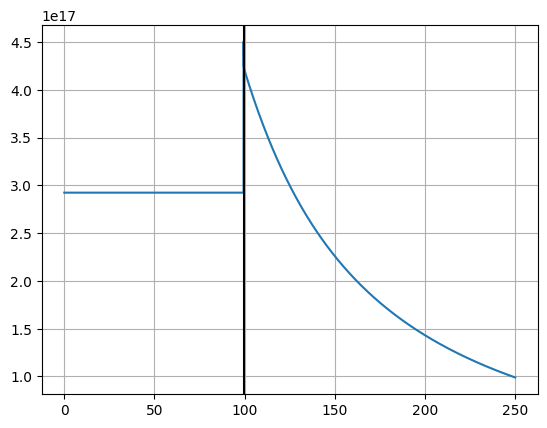

In [ ]:
#             CONSUMO ENERGÉTICO
t_min = int(N_sim*0)
t_max = int(N_sim-1)
tiempo = np.arange(t_min,t_max)*dt
E_K = Energia_cinetica(q_T[:,0],p_T[:,0],p_T[:,1]) #MS(D_ST/dia)^2
E_K = E_K*1.989E30*(151.65E6/24*3600)**2*10**-6    #(MJ)

plt.grid()
#plt.yscale("log")
plt.plot(tiempo,E_K[t_min:t_max],"-")
plt.axvline(t_lan*dt,color="k")
plt.axvline(t_orb*dt,color="g")


plt.legend(("Energía cinética","Despegue","Entrada en órbita"))

plt.xlabel("Tiempo (días)")
plt.ylabel("Energía cinética (MJ)")

print("El costo energético del despegue es de %.2E"%((E_K[t_lan+1]-E_K[t_lan])),"(MJ) por lo que se necesitarían %.2E" % ((E_K[t_lan+1]-E_K[t_lan])/35),"litros de combustible")
print("El coste energético de la entrada en órbita es de %.2E"%((E_K[t_orb+1]-E_K[t_orb])),"(MJ) por lo que se necesitarían %.2E"%((E_K[t_orb+1]-E_K[t_orb])/35),"litros de combustible")
print(" ")
print("El costo energético total es de %.2E"%((E_K[t_lan+1]-E_K[t_lan])+(E_K[t_orb+1]-E_K[t_orb])),"MJ")
print(" ")

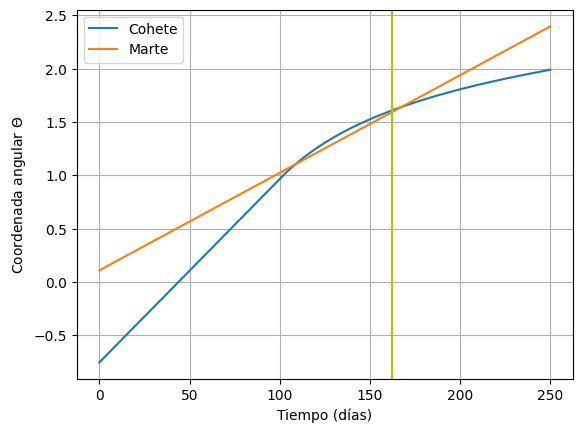

In [ ]:
tiempo = np.arange(0,t_max)*dt

plt.grid()
plt.plot(tiempo,q_T[:N_sim-1,1])
plt.plot(tiempo,alfa("M",tiempo))
plt.legend(("Cohete","Marte"))
plt.ylabel("Coordenada angular $\Theta$")
plt.xlabel("Tiempo (días)")

#plt.xlim(t_d_min-3,t_d_min+3)
#plt.ylim(1.55,1.6)

plt.axvline(t_d_min,color="y")

In [ ]:
#                       ANIMACIÓN

#Definimos una función que crea un frame de la animación

fig, ax = plt.subplots(figsize=(5,5))
#im = plt.imread("Tierra_16x16.png")

def animate(i):
    i=Coef_prop*i
    #ax.clear()
    ax.set_facecolor("black")
    #ax.grid()
    ax.plot(r[i,0],r[i,1],"w.")
    ax.plot([0],[0],"yo",x_coord(D_ST,alfa("T",i*dt)),y_coord(D_ST,alfa("T",i*dt)),"b.",\
                         x_coord(D_SM,alfa("M",i*dt)),y_coord(D_SM,alfa("M",i*dt)),"r.")

    #if i < t_orb-int(N_sim*0.05):
    ax.set_xlim(-1.75,1.75)
    ax.set_ylim(-1.75,1.75)
    """
    if i >= t_orb-int(N_sim*0.05):
      ax.set_xlim(x_coord(D_SM,alfa("M",i*dt))-0.005,x_coord(D_SM,alfa("M",i*dt))+0.005)
      ax.set_ylim(y_coord(D_SM,alfa("M",i*dt))-0.005,y_coord(D_SM,alfa("M",i*dt))+0.005)
    """
    ax.set_xlabel("Distancias en unidades Sol-Tierra ($D_{Sol-Tierra}=151\cdot10^{6} Km$)")
    ax.set_title(f"Misión a Marte.\n Tiempo de misión t = {round(i*dt,2)} días")

ani = FuncAnimation(fig, animate, frames=num_frames,
                    interval=int(1/num_fps*1000), repeat=False)
plt.close()



In [ ]:
#Esta función de matplot guarda el GIF
ani.save(f"Seed={semilla} ; T_sim={round(i*dt,2)} ; dt={dt} ;\
 ang_correccion={alpha_correccion}.gif", dpi=120, writer=PillowWriter(fps=num_fps))